import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [2]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [3]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [4]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
clf.score(X_test,y_test)

0.95614035087719296

In [6]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [7]:
y_pred = clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [9]:
accuracy_score(y_test,y_pred)

0.95614035087719296

In [11]:
cmat = confusion_matrix(y_test,y_pred)
cmat

array([[46,  1],
       [ 4, 63]])

In [12]:
from sklearn.datasets import load_digits
data = load_digits()

X = data.data
y = data.target

In [15]:
img = data.images

In [17]:
X[0].shape,img[0].shape

((64,), (8, 8))

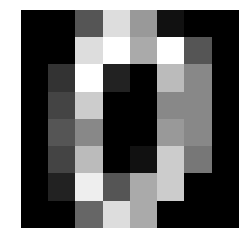

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
plt.imshow(img[0], interpolation='none')
plt.axis('off');

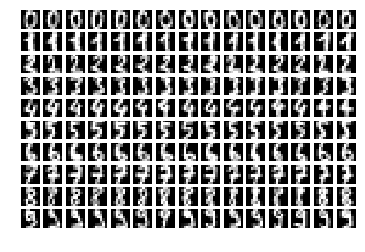

In [20]:
for i in range(10):
    i_th_digit = data.images[data.target == i]
    for j in range(0,15):
        plt.subplot(10, 15, i * 15 + j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j], interpolation='none')

In [21]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                  train_size=0.8,
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [22]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
clf.score(X_test,y_test)

0.94999999999999996

In [24]:
y_pred = clf.predict(X_test)

In [27]:
import pandas as pd
conf_mat = confusion_matrix(y_test,y_pred)
df = pd.DataFrame(conf_mat,columns = range(0,10),index=range(0,10))
print(df)

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  31   0   0   0   0   1   0   3   0
2   0   0  34   2   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  30   0   0   0   0   0
5   0   0   0   0   0  39   0   0   0   1
6   0   1   0   0   0   0  43   0   0   0
7   0   1   0   0   1   0   0  37   0   0
8   0   2   1   0   0   0   0   0  35   1
9   0   0   0   1   0   1   0   0   2  37


In [29]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

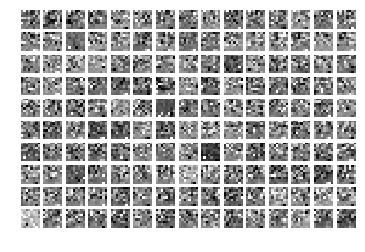

In [30]:
for i in range(10):
    i_th_digit = X_train_pca[y_train == i]
    for j in range(0,15):
        plt.subplot(10, 15, i * 15 + j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8,8), interpolation='none')

In [31]:
clf.fit(X_train_pca,y_train)
clf.score(X_test_pca,y_test)

0.9555555555555556

In [ ]:
y_pred/